In [1]:
#Подопригора БИ-3-20-01
#Вар4 (16)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime
import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
#Для расчет среднеквадратичной ошибки (RMSE), чтобы проверить точность нашей модели на тестовых данных.

from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Временной ряд')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.5)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.5)

       # print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(y)[1])

        plt.tight_layout()
    return 

In [3]:
df1=pd.read_excel("C:/Users/annap/Desktop/я люблю жизнь/kr.xlsx")
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Год           42 non-null     int64  
 1   Уровень ряда  42 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 804.0 bytes


In [5]:
df1.rename(columns = {'Год':'x', 'Уровень ряда':'y'}, inplace = True )
df1.head(10)

,x,y
0,1,1.1
1,2,9.2
2,3,11.3
3,4,7.4
4,5,6.5
5,6,8.6
6,7,15.7
7,8,17.8
8,9,12.9
9,10,13.0


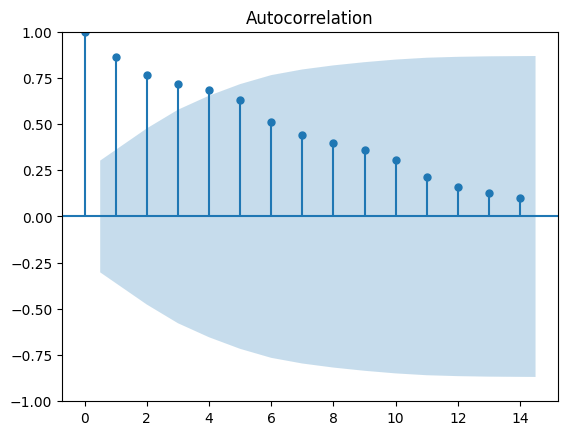

In [10]:
#Стационарность 

sm.graphics.tsa.plot_acf(df1.y,lags=14,alpha=0.05)
plt.show()

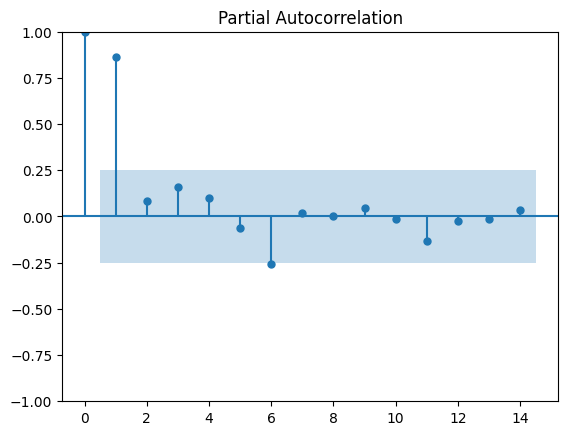

In [11]:
sm.graphics.tsa.plot_pacf(df1.y,lags=14,alpha=0.1);
plt.show()

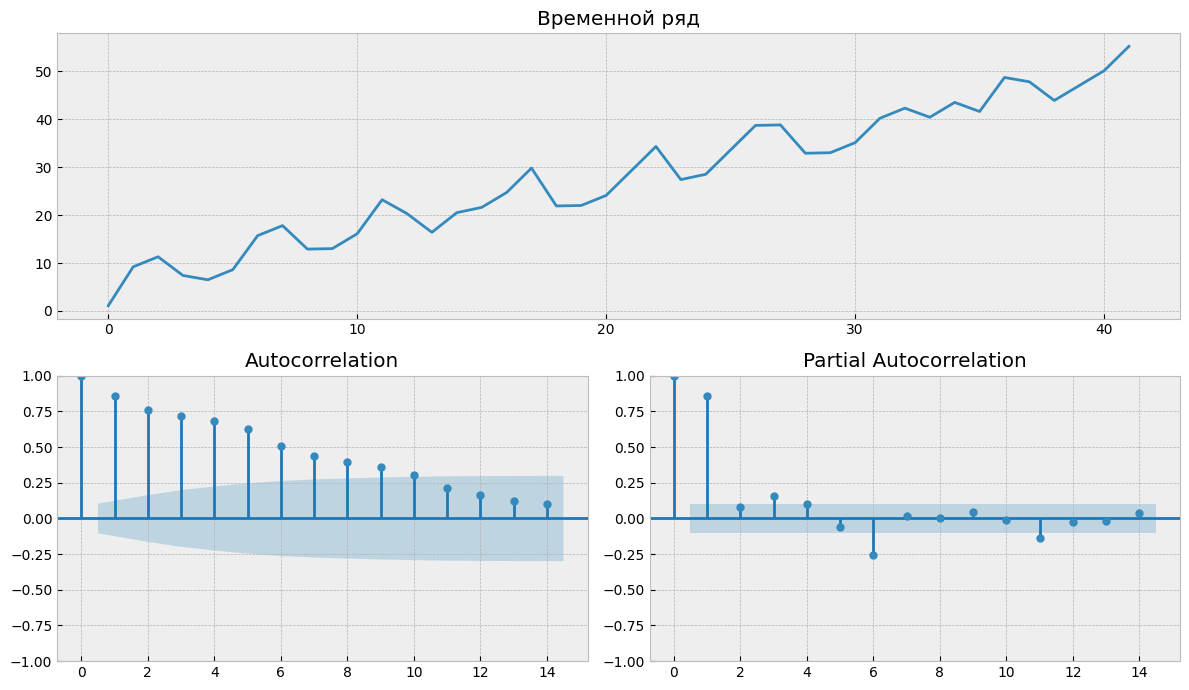

In [13]:
tsplot(df1.y,lags=14)
plt.show() 
#получилось как в R

In [14]:
#Проверка по критерию Дики-Фуллера. Нулевая гипотеза предполагает, что ряд DS - нестационарен
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(df1.y, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: 0.6118814118241386
p-value: 0.9879048535128615


In [15]:
#Ряд нестационарен. p-value = 0,987
#Проверка по критерию KPSS. Нулевая гипотеза предполагает, что ряд ТS - стационарен
# KPSS Test, результат как в R
result = kpss(df1.y, regression='c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])


KPSS Statistic: 0.954519
p-value: 0.010000


C:\Users\annap\AppData\Local\Temp\ipykernel_18044\3195794568.py:4: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  result = kpss(df1.y, regression='c')


In [18]:
import statsmodels.tsa.stattools as tools
test=tools.adfuller(df1.y,regresults=True)
print('adf=',test[0])
print('pvalue=',test[1])
print('Critical values: ',test[2]['5%'])
if test[0]>test[2]['5%']: 
    print('есть единичные корни, ряд не стационарен')
else:
    print('единичных корней нет, ряд стационарен')
    
from statsmodels.tsa.stattools import adfuller, kpss
# ADF Test
result = adfuller(df1.y, autolag='AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
print(result[4])
#Разные уровни значимости
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

adf= 0.6118814118241386
pvalue= 0.9879048535128615
Critical values:  -2.9572185644531253
есть единичные корни, ряд не стационарен
ADF Statistic: 0.6118814118241386
p-value: 0.9879048535128615
{'1%': -3.653519805908203, '5%': -2.9572185644531253, '10%': -2.6175881640625}
Critial Values:
   1%, -3.653519805908203
Critial Values:
   5%, -2.9572185644531253
Critial Values:
   10%, -2.6175881640625


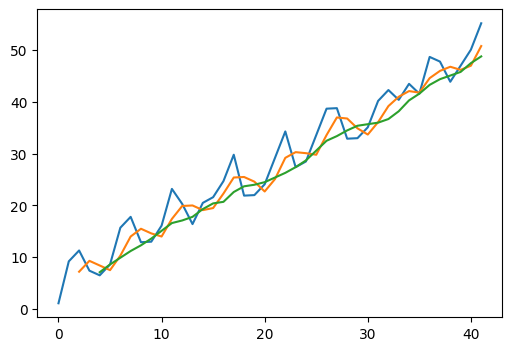

In [20]:
#Сглаживание
df2=df1.copy()
#Метод SMA
#SMA(3), SMA(5)
plt.figure(figsize =(6, 4))
#сглаживание с окном равным 3
for i in range(0,len(df2)-2):
    df2.loc[df2.index[i+2],'SMA_3'] = np.round(((df2.iloc[i,1]+ df2.iloc[i+1,1] +df2.iloc[i+2,1])/3),1)
plt.plot(df1['y'],label='Исходный ряд')
plt.plot(df2['SMA_3'], label='Сглаженный ряд, SMA_3')

#сглаживание с окном равным 5
for i in range(0,len(df2)-4):
    df2.loc[df2.index[i+4],'SMA_5'] = np.round(((df2.iloc[i,1]+ df2.iloc[i+1,1] +df2.iloc[i+2,1]+df2.iloc[i+3,1]+df2.iloc[i+4,1])/5),1)
plt.plot(df2['SMA_5'], label='Сглаженный ряд, SMA_5')

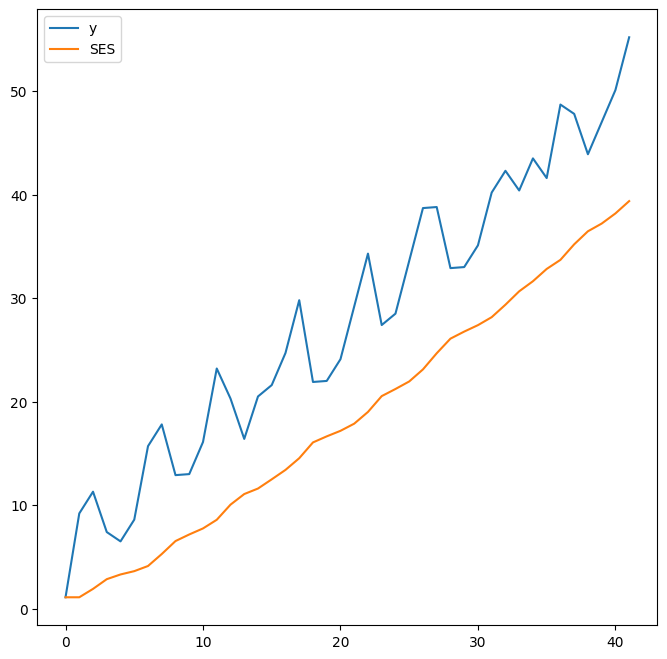

array([40.95642024, 40.95642024, 40.95642024])

In [26]:
#Эксп. Сглаживание
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

fit2=SimpleExpSmoothing(np.asarray(df2.y)).fit(smoothing_level=0.1,optimized=False)
str(fit2)
fit2

fit2=SimpleExpSmoothing(np.asarray(df2.y)).fit(smoothing_level=0.1,optimized=False)
df2['SES'] = fit2.fittedvalues
plt.figure(figsize=(8,8))
plt.plot(df2.y, label='y')
plt.plot(df2['SES'], label='SES')
plt.legend(loc='best')
plt.show()
fit2.forecast(3)

[53.04282416 54.42182545 55.80082673 57.17982801 58.55882929]


C:\Users\annap\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\util\_decorators.py:210: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


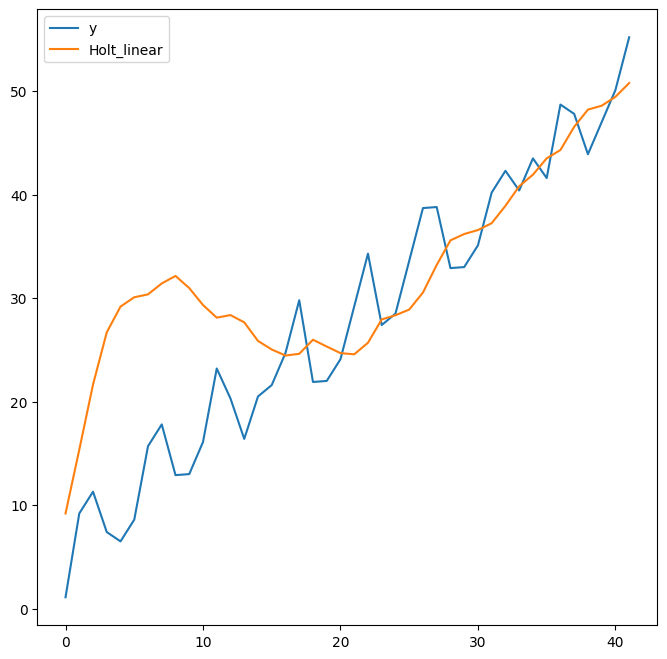

In [27]:
from statsmodels.tsa.holtwinters import Holt
df5= df1.copy()
model=Holt(np.asarray(df5.y))
fit1=model.fit(smoothing_level=0.2,smoothing_trend=0.2)
print(fit1.forecast(5))

plt.figure(figsize=(8,8));
plt.plot(df1.y, label='y');
plt.plot(fit1.fittedvalues, label='Holt_linear');
plt.legend(loc='best');
plt.show();

In [32]:
#ARIMA
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima_process import arma_generate_sample
from statsmodels.tsa.arima.model import ARIMA

model_1_2ar = ARIMA(df1.y, order=(1, 0,0))
model_fitar = model_1_2ar.fit()
print(model_fitar.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   42
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -121.505
Date:                Mon, 05 Jun 2023   AIC                            249.010
Time:                        16:14:57   BIC                            254.223
Sample:                             0   HQIC                           250.920
                                 - 42                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         28.0171     19.189      1.460      0.144      -9.592      65.627
ar.L1          0.9820      0.049     20.149      0.000       0.886       1.078
sigma2        17.6140      5.616      3.136      0.0

42    54.710833
43    54.230469
44    53.758750
45    53.295519
46    52.840624
47    52.393915
48    51.955245
49    51.524469
50    51.101445
51    50.686034
52    50.278098
Name: predicted_mean, dtype: float64


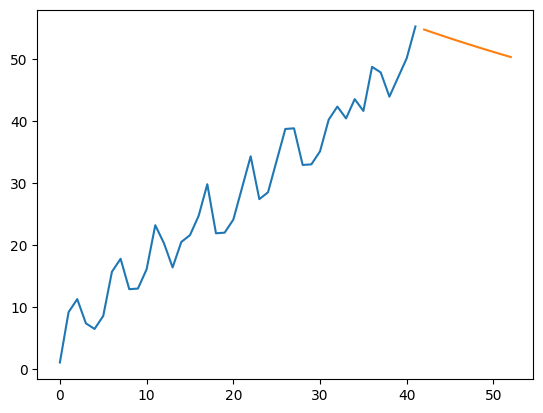

In [33]:
# make prediction
yhat = model_fitar.predict(start=len(df1.y), end=len(df1.y)+10)
print(yhat)
plt.plot(range(0,len(df1.y)),df1.y)
plt.plot(range(len(df1.y),len(df1.y)+11),yhat)
plt.show()